
#  Recommending system with python using Correlation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### get data

In [3]:
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv(r'C:\Users\Chanukya Sai\Downloads\my data science\data sets (for practice only here)\u_data.csv',sep='\t',names=column_names)
movie1=pd.read_csv(r'C:\Users\Chanukya Sai\Downloads\my data science\data sets (for practice only here)\movie_id_titles.csv')

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50.0,5.0,881250949.0
1,0,172.0,5.0,881250949.0
2,0,133.0,1.0,881250949.0
3,196,242.0,3.0,881250949.0
4,186,302.0,3.0,891717742.0


In [5]:
movie1.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=df.merge(movie1,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50.0,5.0,881250949.0,Star Wars (1977)
1,290,50.0,5.0,880473582.0,Star Wars (1977)
2,79,50.0,4.0,891271545.0,Star Wars (1977)
3,2,50.0,5.0,888552084.0,Star Wars (1977)
4,8,50.0,5.0,879362124.0,Star Wars (1977)


lets create a dataframe with avg ratings and no.of ratings

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Anna (1996)                        5.0
Lamerica (1994)                    5.0
Someone Else's America (1995)      5.0
Boys, Les (1997)                   5.0
Letter From Death Row, A (1998)    5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             265
Contact (1997)               256
Fargo (1996)                 243
Scream (1996)                239
Return of the Jedi (1983)    229
Name: rating, dtype: int64

In [9]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [10]:
ratings['count']=df.groupby('title')['rating'].count()
ratings.columns=['avg_ratings','rating_count']
ratings.head()

,avg_ratings,rating_count
title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.979592,49
12 Angry Men (1957),4.327273,55
187 (1997),3.062500,16


### plotting the rating dataframe

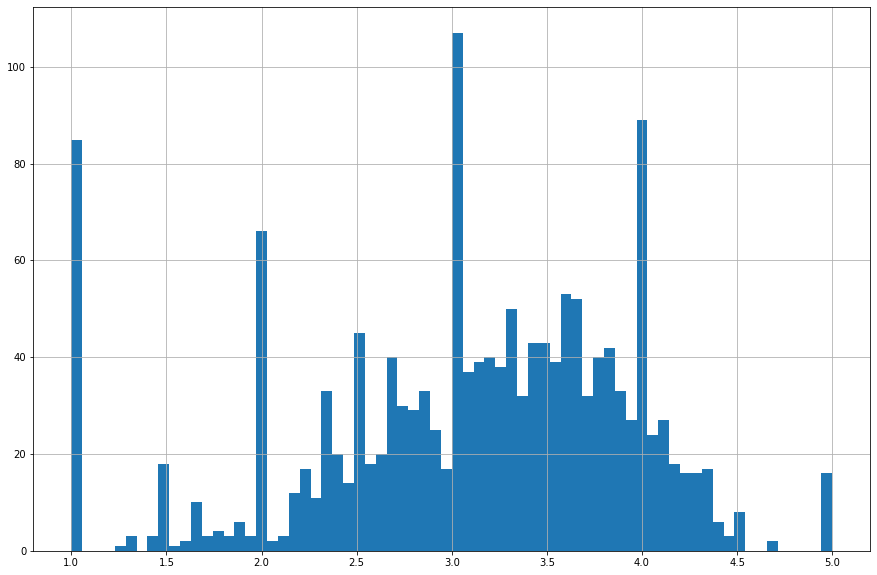

In [11]:
plt.figure(figsize=(15,10))
ratings['avg_ratings'].hist(bins=70)

Text(0, 0.5, 'count of the rating counts i.e,how many movies got x no.of rating count')

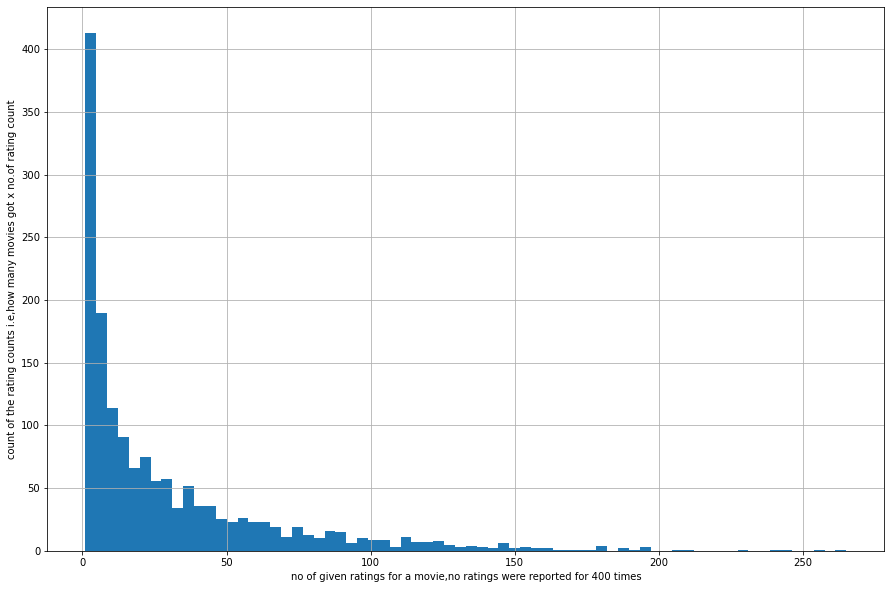

In [12]:
plt.figure(figsize=(15,10))
ratings['rating_count'].hist(bins=70)
plt.xlabel('no of given ratings for a movie,no ratings were reported for 400 times')
plt.ylabel('count of the rating counts i.e,how many movies got x no.of rating count')

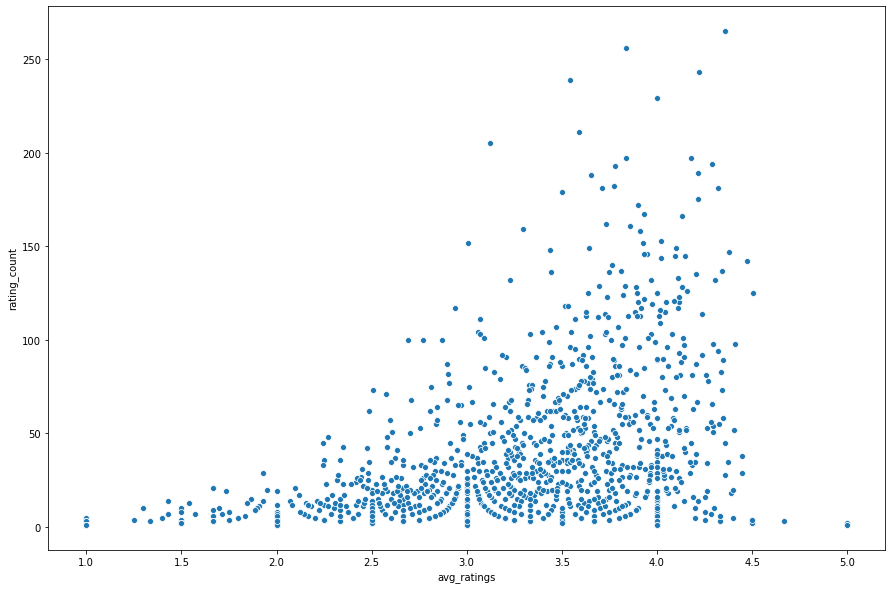

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=ratings['avg_ratings'],y=ratings['rating_count'],data=ratings)


In [14]:
# plt.figure(figsize=(15,10))
# sns.barplot(x=[a for a in ratings['avg_ratings'] if a%0.5==0],y=ratings['rating_count'],data=ratings)

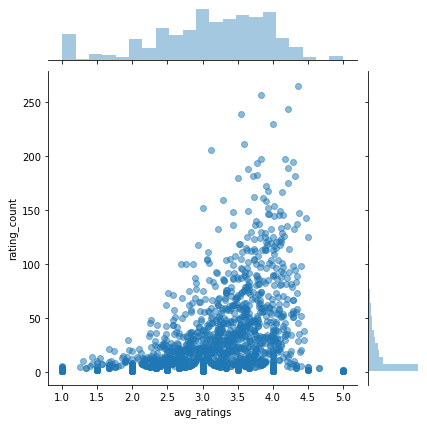

In [15]:
sns.jointplot(x='avg_ratings',y='rating_count',data=ratings,alpha=0.5)

# recommending movies

In [16]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,5.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ratings.sort_values('rating_count',ascending=False).head(10)

,avg_ratings,rating_count
title,,
Star Wars (1977),4.358491,265
Contact (1997),3.839844,256
Fargo (1996),4.222222,243
Scream (1996),3.543933,239
Return of the Jedi (1983),4.000000,229
"English Patient, The (1996)",3.592417,211
Liar Liar (1997),3.121951,205
Toy Story (1995),3.837563,197
Pulp Fiction (1994),4.177665,197


In [18]:
starwars_rating=moviemat['Star Wars (1977)']

In [19]:
similar_ratings=moviemat.corrwith(starwars_rating)

C:\Users\Chanukya Sai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Chanukya Sai\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
starwars_corr=pd.DataFrame(similar_ratings,columns=['Correlation'])

In [23]:
starwars_corr

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.395705
12 Angry Men (1957),0.345331
187 (1997),0.000000
...,...
Young Guns (1988),0.137409
Young Guns II (1990),0.562244
"Young Poisoner's Handbook, The (1995)",-0.535626


In [24]:
starwars_corr.dropna(inplace=True)
starwars_corr

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.395705
12 Angry Men (1957),0.345331
187 (1997),0.000000
...,...
Young Frankenstein (1974),0.076457
Young Guns (1988),0.137409
Young Guns II (1990),0.562244


-1.000000    30
 0.000000    28
 1.000000    17
 1.000000    11
-1.000000    11
             ..
 0.210468     1
-0.023669     1
-0.079948     1
 0.200000     1
-0.041080     1
Name: Correlation, Length: 1011, dtype: int64